
### Customer Shopping Data Analysis with Python

In [1]:
# Install Pandas
!pip install pandas

In [2]:
# Upload pandas packages(librairy)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE


In [4]:
# Import Csv file with pandas packages
df=pd.read_csv("customer_shopping_data.csv")
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


### Data Understanding
- Get the Data Type
- Returns the dimensions(rows, columns) of the Dataframe
- Returm the first 10 rows of the dataframe
- Returns the column labels of the Dataframe
- Returns the data types of each column
- Checks for missing values in the DataFrame for each column
- Returns summary statistics of numerical columns(Quantitative Variables)

In [7]:
# Data Type
type(df)

pandas.core.frame.DataFrame

In [9]:
# Returns the dimensions(rows, columns) of the Dataframe
df.shape

(99457, 10)

In [11]:
# Returm the first 10 rows of the dataframe
df.head(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [13]:
# Returm the last 10 rows of the dataframe
df.tail(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [15]:
# Returns the column labels of the Dataframe
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [17]:
# Returns the data types of each column
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

In [19]:
# Checks for missing values in the DataFrame for each column
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [21]:
# Returns summary statistics of numerical columns(Quantitative Variables)
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [23]:
# Display distinct value for each columns
df.nunique()

invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


### Data Preparation
- Dropping irrelevant columns and rows
- Identifying dupplicated rows
- Renaming columns and rows
- Fix blank space in Invoice Date
- Feature Creation

In [27]:
# delete or drop specified columns from the DataFrame
df = df.drop(["invoice_no"], axis=1)
df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [29]:
# Count duplicate row in data frame
df.duplicated().sum()

0

In [31]:
#Second, adding a sales coloumn 
Sales_col = df['quantity'] * df['price']
df.insert(loc=7, column='Sales', value=Sales_col)
#previewing the first 5 entries of the dataframe to see if 'Months' and 'Sales' were added
df.head()

,customer_id,gender,age,category,quantity,price,payment_method,Sales,invoice_date,shopping_mall
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,7502.00,5/8/2022,Kanyon
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,5401.53,12/12/2021,Forum Istanbul
2,C266599,Male,20,Clothing,1,300.08,Cash,300.08,9/11/2021,Metrocity
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,15004.25,16/05/2021,Metropol AVM
4,C189076,Female,53,Books,4,60.60,Cash,242.40,24/10/2021,Kanyon


In [49]:
# Fix blank space in Invoice Date
#df['invoice_date'].str.strip()

In [33]:
#Changing data type
df['invoice_date'] = df['invoice_date'].apply(pd.to_datetime)
#Checking after changing data type
df.info()

C:\Users\broul\AppData\Local\Temp\ipykernel_17384\738744472.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['invoice_date'] = df['invoice_date'].apply(pd.to_datetime)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     99457 non-null  object        
 1   gender          99457 non-null  object        
 2   age             99457 non-null  int64         
 3   category        99457 non-null  object        
 4   quantity        99457 non-null  int64         
 5   price           99457 non-null  float64       
 6   payment_method  99457 non-null  object        
 7   Sales           99457 non-null  float64       
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 7.6+ MB


In [35]:
#converting the data in the 'invoice_date' coloumn to datetime-type data 
#df['invoice_date'] = pd.to_datetime(df['invoice_date'],errors='coerce').dt.strftime('%d/%m/%y %H:%M')       #to change the format of the datetime (to day/month/year)
#print('Order dates after converting:')
df['invoice_date'].head()

0   2022-05-08
1   2021-12-12
2   2021-09-11
3   2021-05-16
4   2021-10-24
Name: invoice_date, dtype: datetime64[ns]

In [37]:
df['invoice_date'].sample(5)

96466   2022-08-06
33091   2021-03-28
82531   2022-06-29
22061   2022-01-21
95233   2021-10-19
Name: invoice_date, dtype: datetime64[ns]

In [39]:
#First, adding a months coloumn
Months_col = pd.to_datetime(df['invoice_date']).dt.month_name().str[:3]        #creating a months coloumn (by month abbreviations)
df.insert(loc=10, column='Months', value=Months_col)              #inserting the months coloumn into the dataframe 

In [41]:
df.head(3)

,customer_id,gender,age,category,quantity,price,payment_method,Sales,invoice_date,shopping_mall,Months
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,7502.00,2022-05-08,Kanyon,May
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,5401.53,2021-12-12,Forum Istanbul,Dec
2,C266599,Male,20,Clothing,1,300.08,Cash,300.08,2021-09-11,Metrocity,Sep


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     99457 non-null  object        
 1   gender          99457 non-null  object        
 2   age             99457 non-null  int64         
 3   category        99457 non-null  object        
 4   quantity        99457 non-null  int64         
 5   price           99457 non-null  float64       
 6   payment_method  99457 non-null  object        
 7   Sales           99457 non-null  float64       
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
 10  Months          99457 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 8.3+ MB


In [45]:
df.invoice_date.unique()

<DatetimeArray>
['2022-05-08 00:00:00', '2021-12-12 00:00:00', '2021-09-11 00:00:00',
 '2021-05-16 00:00:00', '2021-10-24 00:00:00', '2022-05-24 00:00:00',
 '2022-03-13 00:00:00', '2021-01-13 00:00:00', '2021-04-11 00:00:00',
 '2021-08-22 00:00:00',
 ...
 '2022-12-06 00:00:00', '2021-01-02 00:00:00', '2021-02-07 00:00:00',
 '2021-07-03 00:00:00', '2021-05-18 00:00:00', '2021-01-29 00:00:00',
 '2021-01-01 00:00:00', '2021-12-08 00:00:00', '2022-08-01 00:00:00',
 '2021-11-05 00:00:00']
Length: 797, dtype: datetime64[ns]

In [47]:
df.age.unique()

array([28, 21, 20, 66, 53, 49, 32, 69, 60, 36, 29, 67, 25, 24, 65, 42, 46,
       23, 27, 52, 44, 51, 50, 68, 43, 59, 54, 48, 40, 41, 19, 18, 22, 61,
       45, 64, 33, 63, 34, 47, 38, 57, 30, 26, 62, 39, 55, 56, 35, 31, 37,
       58], dtype=int64)

In [49]:
def age_category(a):
    if a<1:
        return 'Infants'
    elif 1 <= a<= 12:
        return 'Children'
    elif 13 <= a<= 17:
        return 'Adolescant'
    elif 18 <= a<= 65:
        return 'Adult'
    else:
        return 'Senior'
df['age_category'] = df.age.apply(lambda x: age_category(x))
#Checking age category values
df.age_category.unique()

array(['Adult', 'Senior'], dtype=object)

## Exploratory Data Analysis(EDA)
We will cover how to visually analyze:
- Categorical variables with bar chart,
- Numerical variables with histograms,
- Relationships between numerical variables with scatter plots, joint plots, and pair plots, and
- Relationships between numerical and categorical variables with box-and-whisker plots and complex conditional plots.

In [51]:
# Returns summary statistics of numerical columns(Quantitative Variables)
df.describe()

,age,quantity,price,Sales,invoice_date
count,99457.000000,99457.000000,99457.000000,99457.000000,99457
mean,43.427089,3.003429,689.256321,2528.789268,2022-02-08 23:30:48.666257152
min,18.000000,1.000000,5.230000,5.230000,2021-01-01 00:00:00
25%,30.000000,2.000000,45.450000,136.350000,2021-07-19 00:00:00
50%,43.000000,3.000000,203.300000,600.170000,2022-02-05 00:00:00
75%,56.000000,4.000000,1200.320000,2700.720000,2022-08-22 00:00:00
max,69.000000,5.000000,5250.000000,26250.000000,2023-12-02 00:00:00
std,14.990054,1.413025,941.184567,4222.475781,NaN


## Univariat Analysis Variables

In [87]:
#Divide into NumericalColumns
#columns=df.columns.tolist()
#num_col_eda=['age','quantity','price','Sales']
#df[num_col_eda].hist(figsize=(10,10))
#plt.show()

In [55]:
# Display all categorical variables inferior to 5 distincts values
#categorical_columns=df.nunique()[df.nunique()<=10].keys().to_list()
#categorical_columns

In [81]:
# Other Method to dive Categorcal and Numerical Column
#cat=[]
#num=[]
#for column in df.columns:
#    if df[column].nunique()>10:
#        num.append(column)
#    else:
#        cat.append(column)

In [83]:
#cat

In [85]:
#num

In [73]:
#numeric_data = df.select_dtypes(include=[np.number])
#categorical_data = df.select_dtypes(exclude=[np.number])

### Numerical variables with histograms

In [53]:
df.shopping_mall.unique()

array(['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall',
       'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center'], dtype=object)

In [55]:
# Returm the first 10 rows of the dataframe
df.head(5)

,customer_id,gender,age,category,quantity,price,payment_method,Sales,invoice_date,shopping_mall,Months,age_category
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,7502.00,2022-05-08,Kanyon,May,Adult
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,5401.53,2021-12-12,Forum Istanbul,Dec,Adult
2,C266599,Male,20,Clothing,1,300.08,Cash,300.08,2021-09-11,Metrocity,Sep,Adult
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,15004.25,2021-05-16,Metropol AVM,May,Senior
4,C189076,Female,53,Books,4,60.60,Cash,242.40,2021-10-24,Kanyon,Oct,Adult


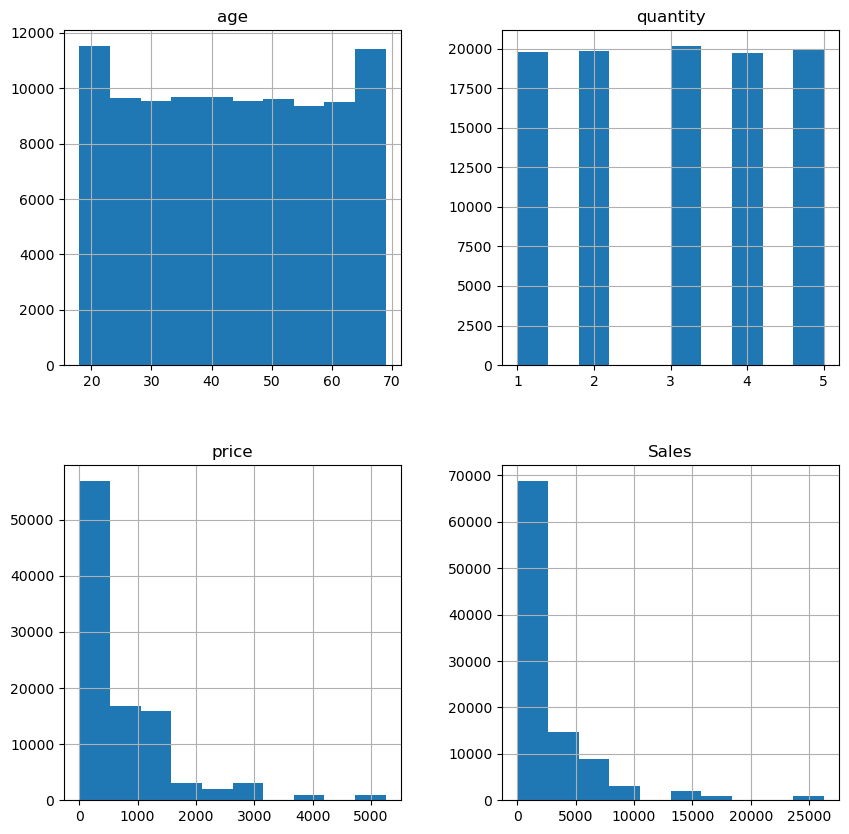

In [57]:
#Divide into NumericalColumns
columns=df.columns.tolist()
num_col_eda=['age','quantity','price','Sales']
df[num_col_eda].hist(figsize=(10,10))
plt.show()

### Categorical variables with CountPlot

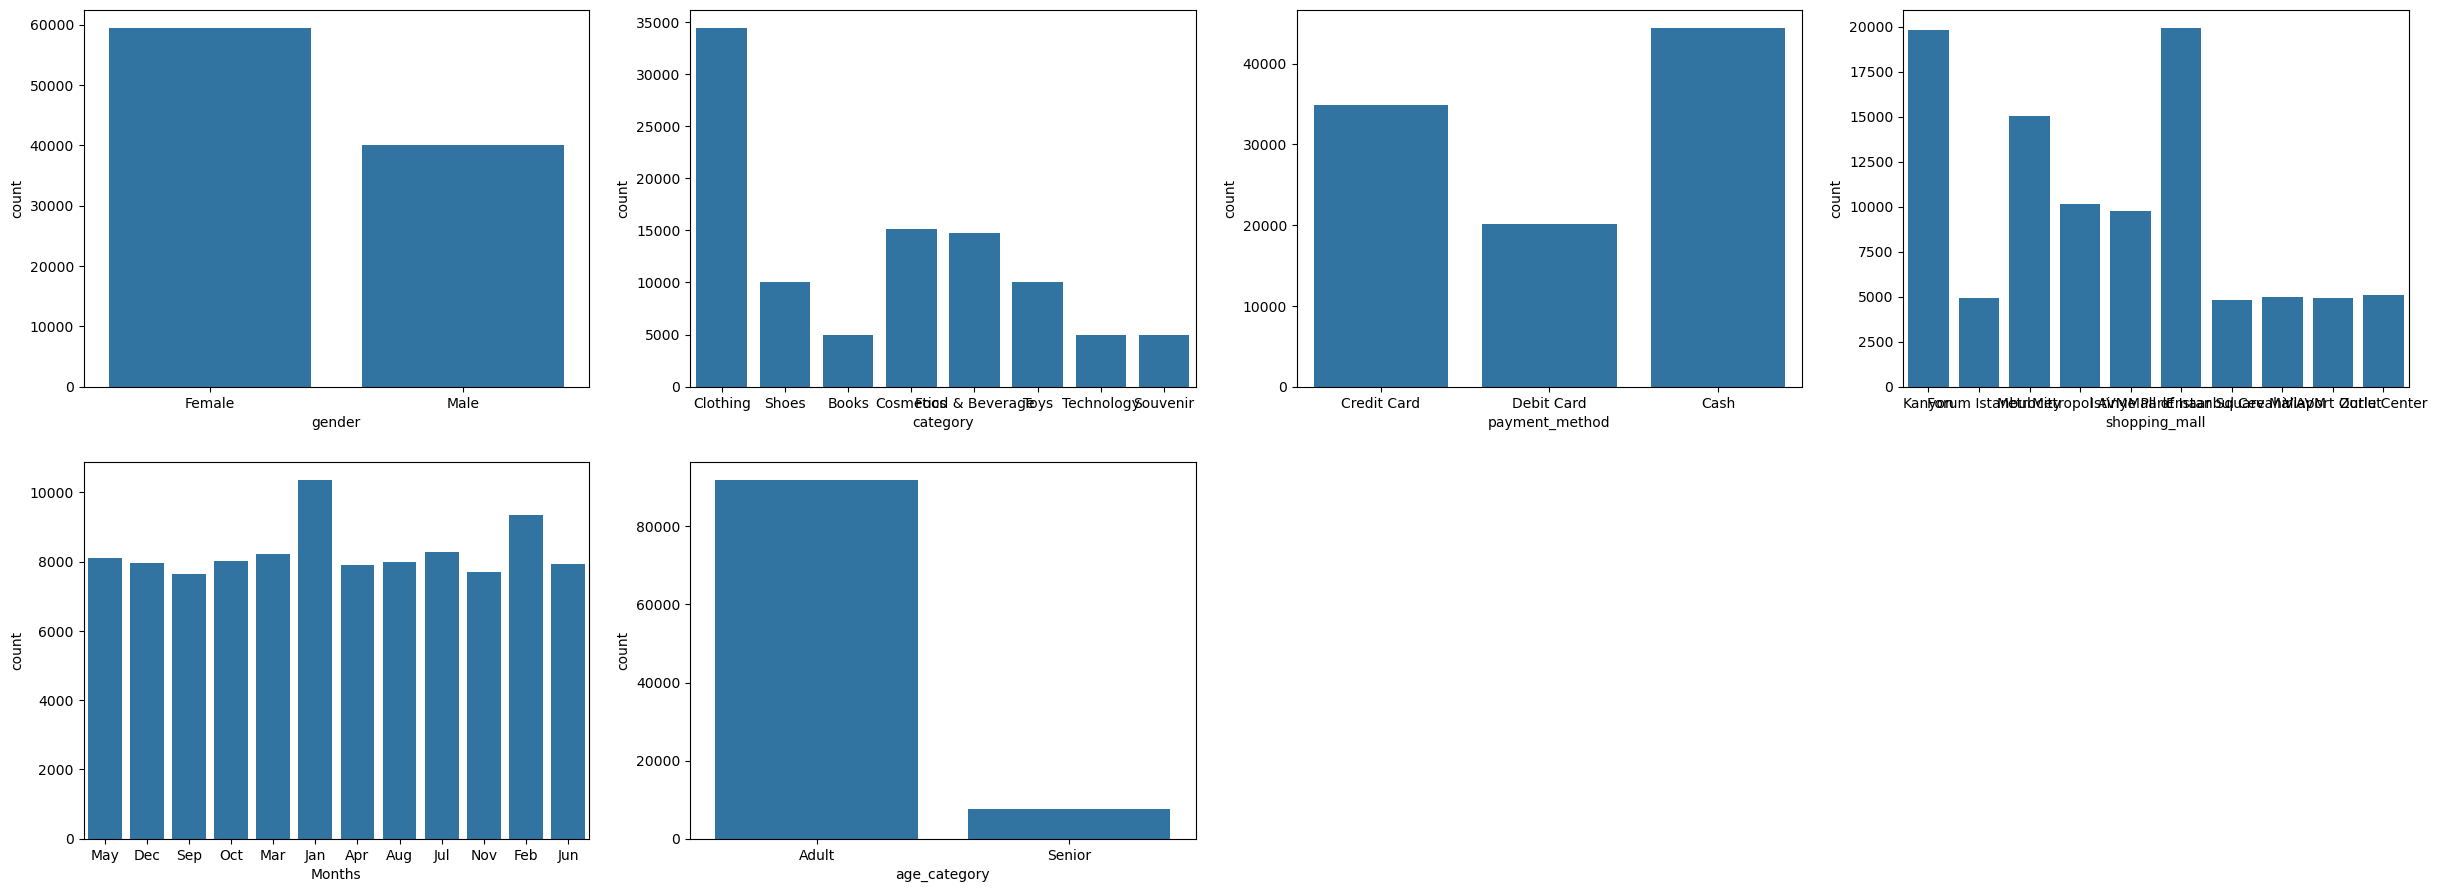

In [59]:
#Divide into categoricalColumns
#columns=df.columns.tolist()
cat_col_eda=['gender','category','payment_method','shopping_mall','Months','age_category']
#df[cat_col_eda].hist(figsize=(10,10))
#plt.show()

#For all columns doing countplots
fig = plt.figure(figsize=(30,46))
for idx,i in enumerate(cat_col_eda):
    ax=plt.subplot(8,4,idx+1)
    sns.countplot(x=i,data=df,ax=ax)
plt.show()

### Dipslay the number of customer in dataframe

In [61]:
df.customer_id.count()

99457

### Dipslay total sale quantity in dataframe

In [63]:
df['quantity'].sum()

298712

### Dipslay total price in dataframe

In [65]:
df['price'].sum()

68551365.91

### Diplay a barplot and a piechart to show the Gender and Age category distribution across our customers dataset.

In [67]:
# Count and display Gender information(Categorical Column)
df['gender'].value_counts()

gender
Female    59482
Male      39975
Name: count, dtype: int64

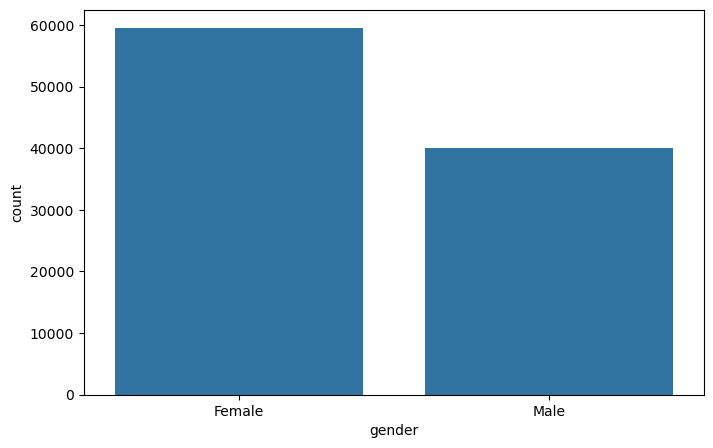

In [69]:
plt.figure(figsize=(8,5))
sns.countplot(x='gender',data=df)
plt.show()

In [71]:
# Count and display Age Category information(Categorical Column)
df['age_category'].value_counts()

age_category
Adult     91886
Senior     7571
Name: count, dtype: int64

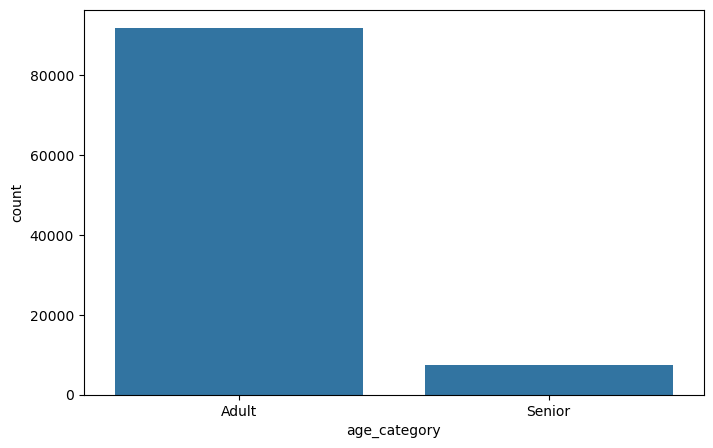

In [73]:
plt.figure(figsize=(8,5))
sns.countplot(x='age_category',data=df)
plt.show()

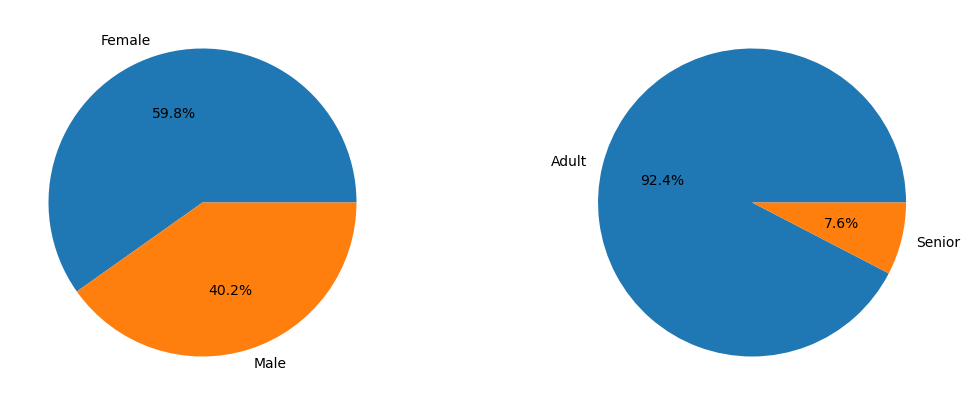

In [75]:
#Visualizing Customer Gender and Age Category Profile
col = ['gender', 'age_category']
fig, axs = plt.subplots(ncols = 2, figsize = (13,5))
for i in range(len(col)):
    df_group = df.groupby([col[i]])['customer_id'].nunique().reset_index()
    axs[i].pie(df_group['customer_id'], labels = df_group[col[i]], autopct = '%1.1f%%')
plt.show()

In [77]:
# Count and display Age information(Numerical Column)
df['age'].mean()

43.42708909377922

### Display customer Payment method(Categorical Column)


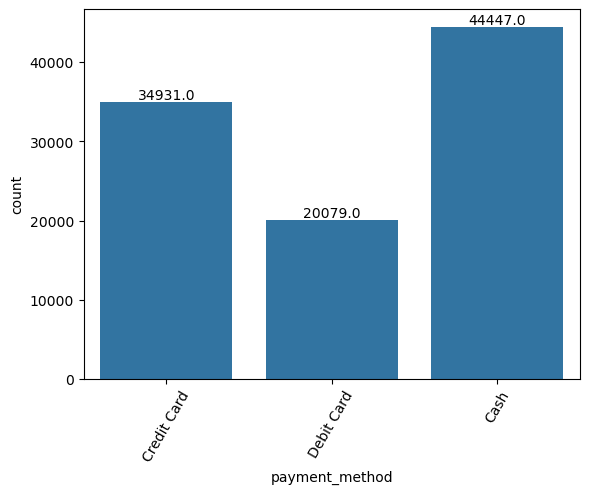

In [79]:
# Display customer Payment method(Categorical Column)
m=sns.countplot(df, x='payment_method')
plt.xticks(rotation=60)
for p in m.patches:
    height = p.get_height()
    m.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)
plt.show()

### Plotting countplot to know category with most sales(Categorical Column)

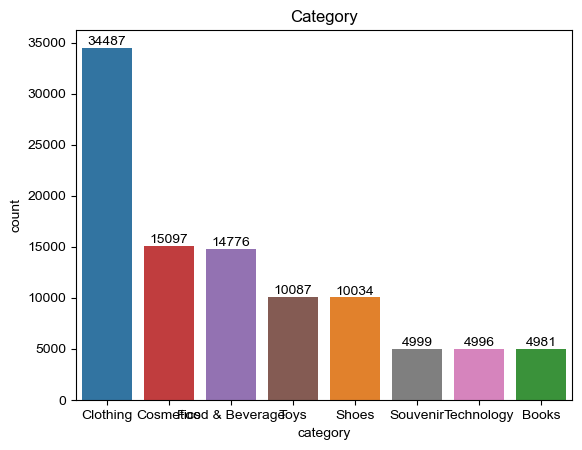

In [81]:
# plotting countplot to know category with most sales
ax = sns.countplot(x='category', data = df, hue= 'category',order= df['category'].value_counts().index)
plt.title('Category')
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc={'figure.figsize':(20,5)})
plt.show()

### What are the products available at the mall?

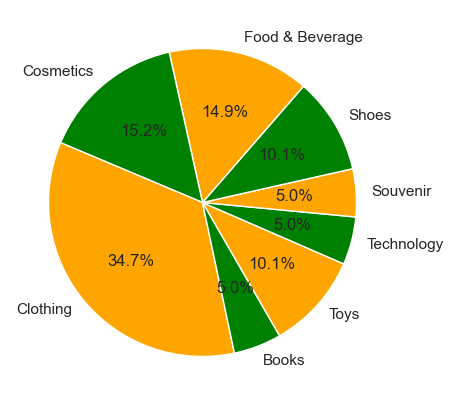

In [83]:
# plotting bar chart for Category and its count
gb= df.groupby(['category'], as_index= False) ['customer_id'].count().sort_values(by= 'category', ascending= False)
ax = plt.pie(gb['customer_id'], labels=gb['category'], autopct='%1.1f%%', startangle=300, colors=['Orange', 'Green'])
plt.show()

### Count and display Shopping mall information(Categorical Column)

In [85]:
# Count and display shopping mall information(Categorical Column)
df['shopping_mall'].value_counts()

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

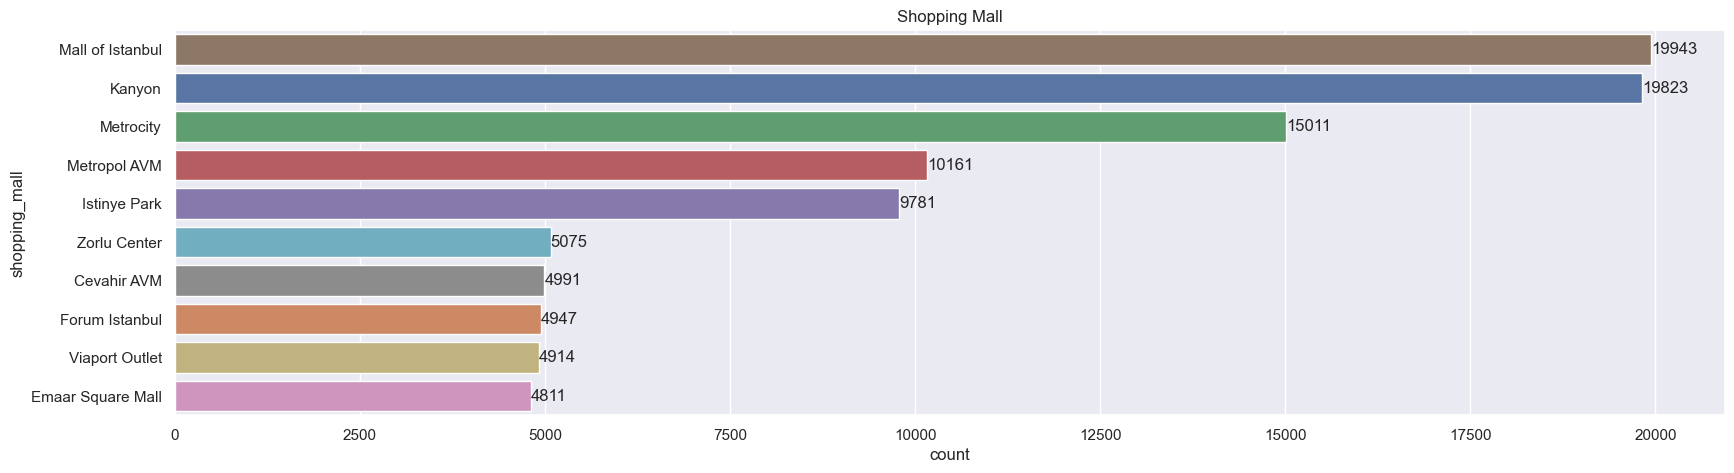

In [87]:
# plotting countplot to know Shopping Mall with most sales
ax = sns.countplot(y='shopping_mall', data = df, hue= 'shopping_mall',order= df['shopping_mall'].value_counts().index)
plt.title('Shopping Mall')
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc={'figure.figsize':(20,10)})
plt.show()

### Plotting countplot to know orders per Month

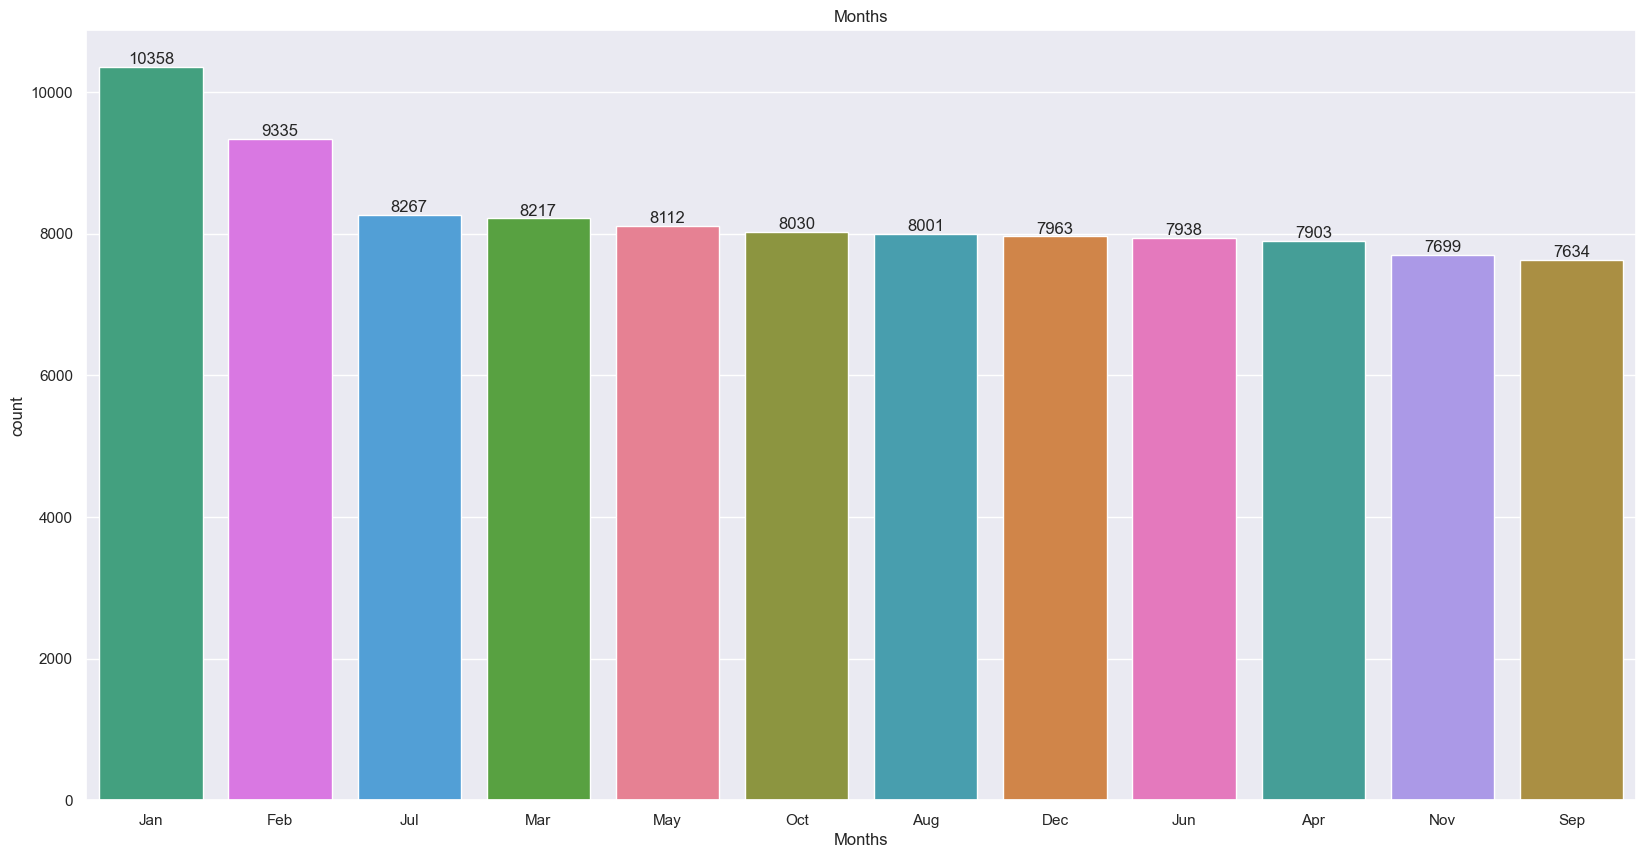

In [89]:
# plotting countplot to know orders per month
ax = sns.countplot(x='Months', data = df, hue= 'Months',order= df['Months'].value_counts().index)
plt.title('Months')
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc={'figure.figsize':(10,5)})
plt.show()

### Display Price in Boxplot(Numerical Column)

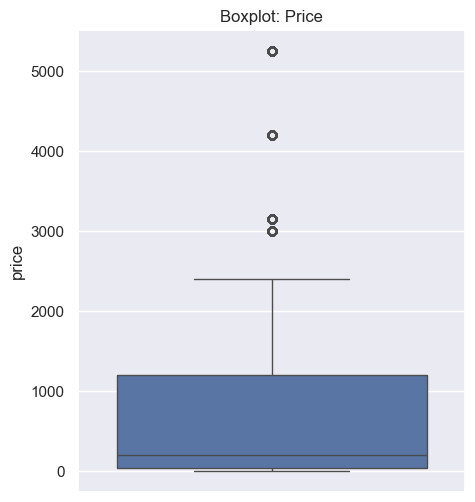

In [92]:
plt.figure(figsize=(5, 6))
sns.boxplot(y='price',data=df)
plt.title('Boxplot: Price')
plt.show()

#### Conclusion: We can see a outlier detect in this Boxplot. this outlier say some of product are expensive than other by starting for 3000 to 40000 but for our project we will keep all this outlier some product are expensive some are less 

### Display Sales obtain by make a product * Quantity in Boxplot

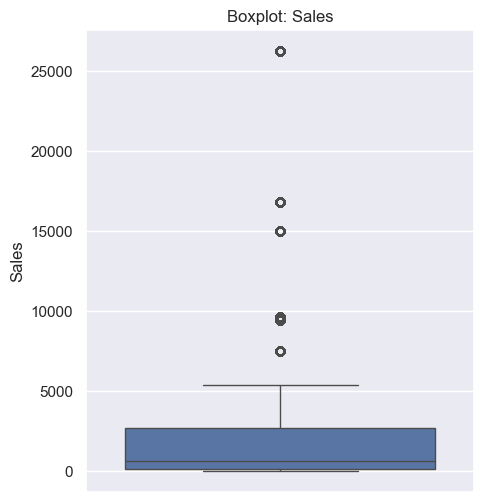

In [94]:
plt.figure(figsize=(5,6))
sns.boxplot(y='Sales',data=df)
plt.title('Boxplot: Sales')
plt.show()

#### Conclusion: By Multiple Price by quantity we obtain a Sales column in this colomn we can notice an outlier that start by 7500 to 26000.This outlier are important and don't need to be delect or fix it because of price of couple product that higher in our dataframe

## Bivariat Analysis Variables

### Display Gender by Age Category (Categorical-Categorical column)

In [96]:
# Display Gender by Age Category(Categorical-Categorical columns)
# Diplay pivot table Gender by Age Category
df.pivot_table(index='gender',columns='age_category',values='customer_id',aggfunc='count')

age_category,Adult,Senior
gender,,
Female,54965,4517
Male,36921,3054


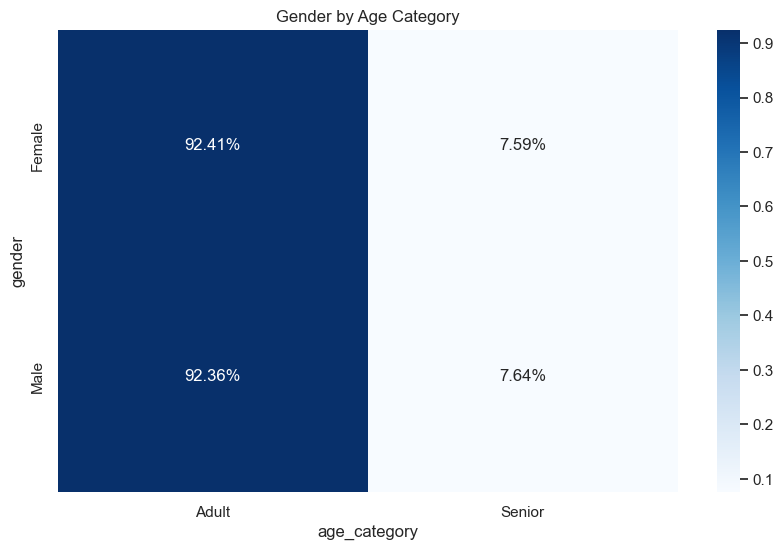

In [98]:
# Display Gender by Age Category
cross_tab = pd.crosstab(df['gender'], df['age_category'], values=df['gender'], aggfunc='count', normalize='index')
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt=".2%", cbar=True)
plt.title('Gender by Age Category')
plt.show()

In [100]:
# Dipslay Gender by Age Category(Senior)(Categorical-Categorical columns)
df1= df[df['age_category']=="Adult"]
att_cnt=df1['gender'].value_counts()
att_cnt

gender
Female    54965
Male      36921
Name: count, dtype: int64

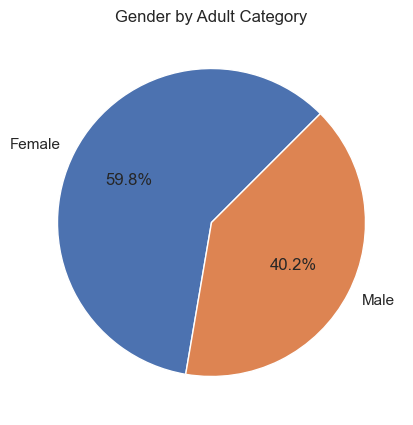

In [102]:
plt.pie(att_cnt, labels=att_cnt.index,autopct='%1.1f%%', startangle=45)
plt.title('Gender by Adult Category')
plt.show()

### The following table displays the total sales amount for each month:

In [104]:
#Third, grouping the data by month and calculating the total sales (and quantities) amount for each month
sales_per_month = df.groupby('Months')['Sales'].sum().sort_values(ascending=False)

#sorting the data in alphabetical order by month name
#specifying the sorting order 
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#sorting the data
sales_per_month = sales_per_month.reindex(sort_order)

#displaying the results 
print('The following table displays the total sales amount for each month:')
sales_per_month

The following table displays the total sales amount for each month:


Months
Jan    25755677.45
Feb    23980067.68
Mar    20826196.84
Apr    20360575.14
May    20608277.98
Jun    20344057.02
Jul    20721536.72
Aug    19812561.97
Sep    19248108.83
Oct    21049007.84
Nov    18700196.96
Dec    20099529.82
Name: Sales, dtype: float64

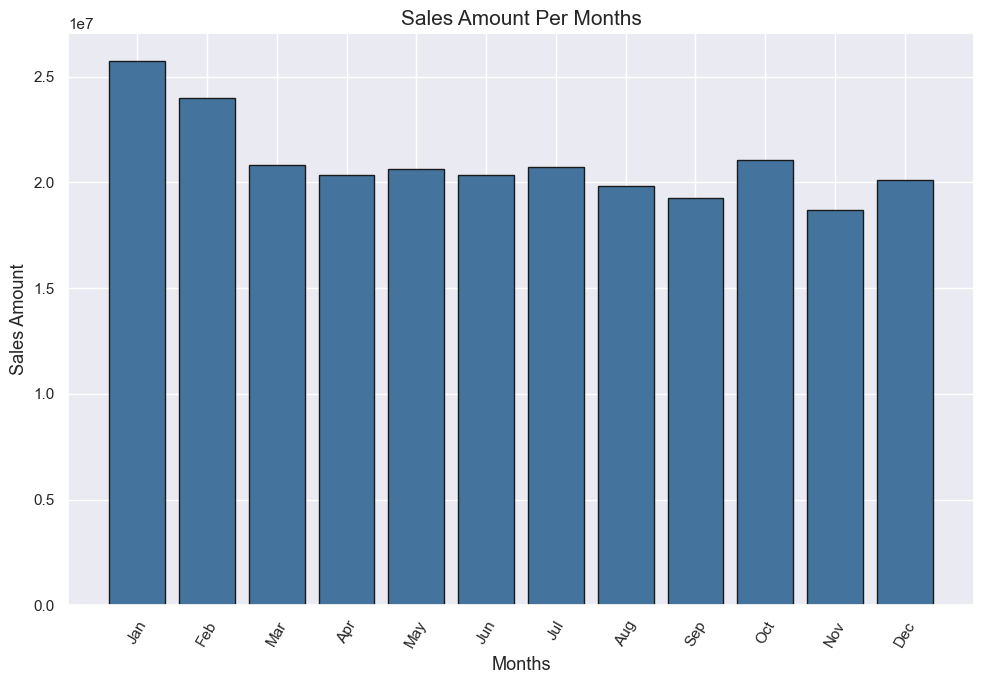

In [106]:
sales_per_month
#Finally, we can once again visualize the data using the bar chart to get a better view of the sales per months

Sale = sales_per_month.index.values 

#setting the figure size 
plt.figure(figsize=(10,7))

#plotting a bar chart 
plt.bar(Sale, sales_per_month,
        color='#44749d',
        width=0.8,
        linewidth=1,
        edgecolor='k')

#adding a title 
plt.title('Sales Amount Per Months', fontsize=15)

#adding labels to the axes 
plt.xlabel('Months', fontsize=13)
plt.ylabel('Sales Amount', fontsize=13)

#adjusting the rotation of the x-axis' labels 
plt.xticks(rotation=60)

#displaying the bar chart 
plt.tight_layout()
plt.show()

### Display the best month for sales 

In [108]:
#Now we can extract the month with the most sales
sales_per_month_sorted = sales_per_month.sort_values(ascending=False)
best_month = sales_per_month_sorted.index[0]

#getting month full name 
best_month = pd.to_datetime(best_month, format='%b').month_name()

#reporting the best month for sales 
print('The best month for sales was:', best_month)

The best month for sales was: January


### What is the favorite payment method by Gender?(Categorical-Categorical column)

<Figure size 1000x500 with 0 Axes>

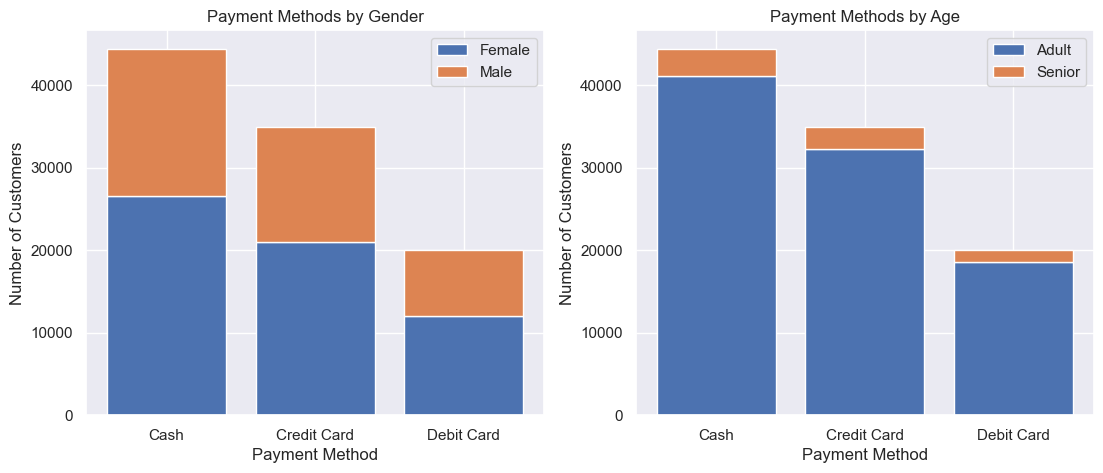

In [110]:
col = ['gender', 'age_category']
title= ['Gender', 'Age']
plt.tight_layout(pad = 2)
fig, axs = plt.subplots(ncols = 2, figsize = (13,5))
for i in range(len(col)):
    df_col = df[col[i]]
    df_new = df.pivot_table(index = 'payment_method', columns = col[i],
                             values = 'customer_id', aggfunc = 'nunique').reset_index()
    list_item = df_col.unique()
    axs[i].bar(df_new['payment_method'], df_new[list_item[0]] , label = list_item[0])
    bottom = []
    for u in range(len(list_item)-1):
        bottom.extend(df_new[list_item[u]])
        axs[i].bar(df_new['payment_method'], df_new[list_item[u+1]], label = list_item[u+1], bottom = bottom)
    axs[i].legend()
    axs[i].set_xlabel('Payment Method')
    axs[i].set_ylabel('Number of Customers')
    axs[i].set_title(f'Payment Methods by {title[i]}')
plt.show()

In [112]:
import pathlib 
import matplotlib as mpl
import warnings
warnings.simplefilter("ignore")

### Dipslay Boxplot Price by Gender(Categorical-Numerical column)

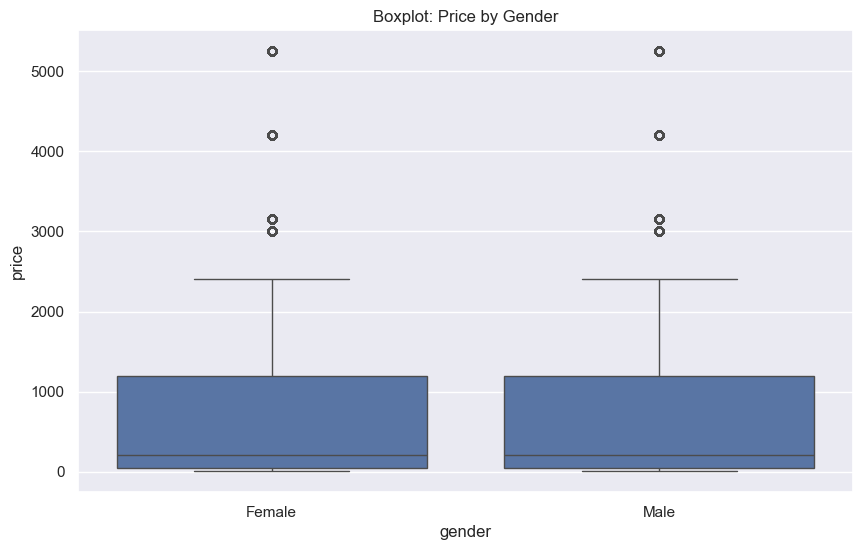

In [114]:
# Dipslay Boxplot Price by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='price', data=df)
plt.title('Boxplot: Price by Gender')
plt.show()

### Dipslay Boxplot Sales by Gender(Categorical-Numerical column)

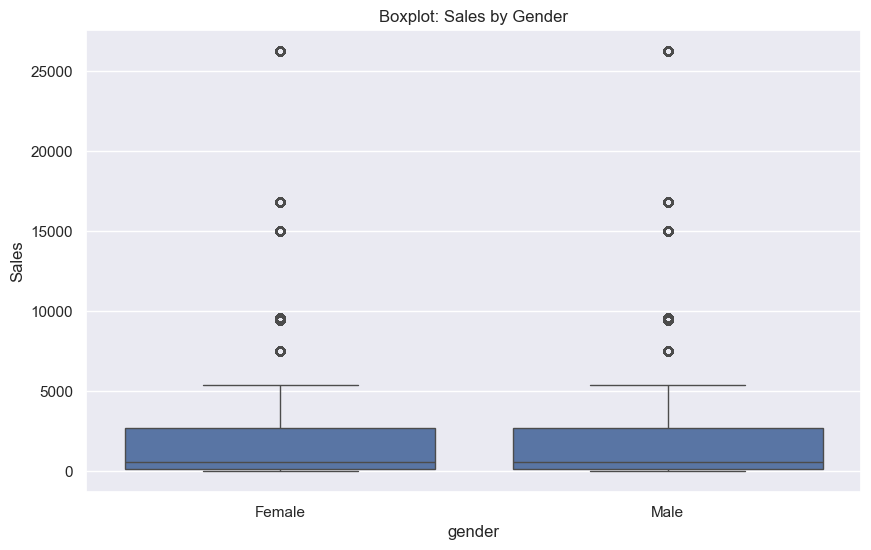

In [116]:
# Dipslay Boxplot Sales by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='Sales', data=df)
plt.title('Boxplot: Sales by Gender')
plt.show()

### Display Histogram with Category by Gender(Categorical-Categorical column)

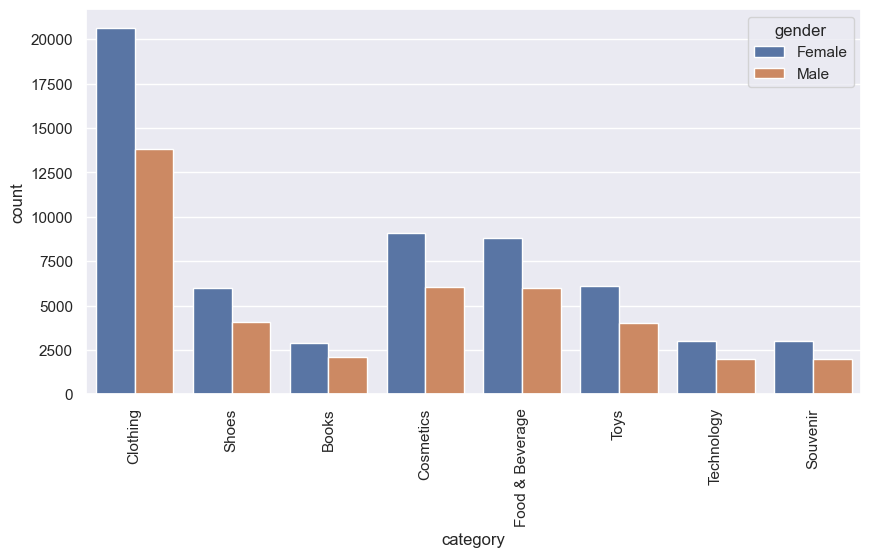

In [118]:
# Display Histogram with Category by Gender 
m=sns.countplot(data=df, x='category',hue='gender')
#m=sns.barplot(x='category', y='Sales',hue='gender',data=df)
plt.xticks(rotation=90)
plt.show()

## Univariat Analysis Variables

### Relationship between how much a product costs and the quantity sold? (Categorical-Numerical-Categorical column)

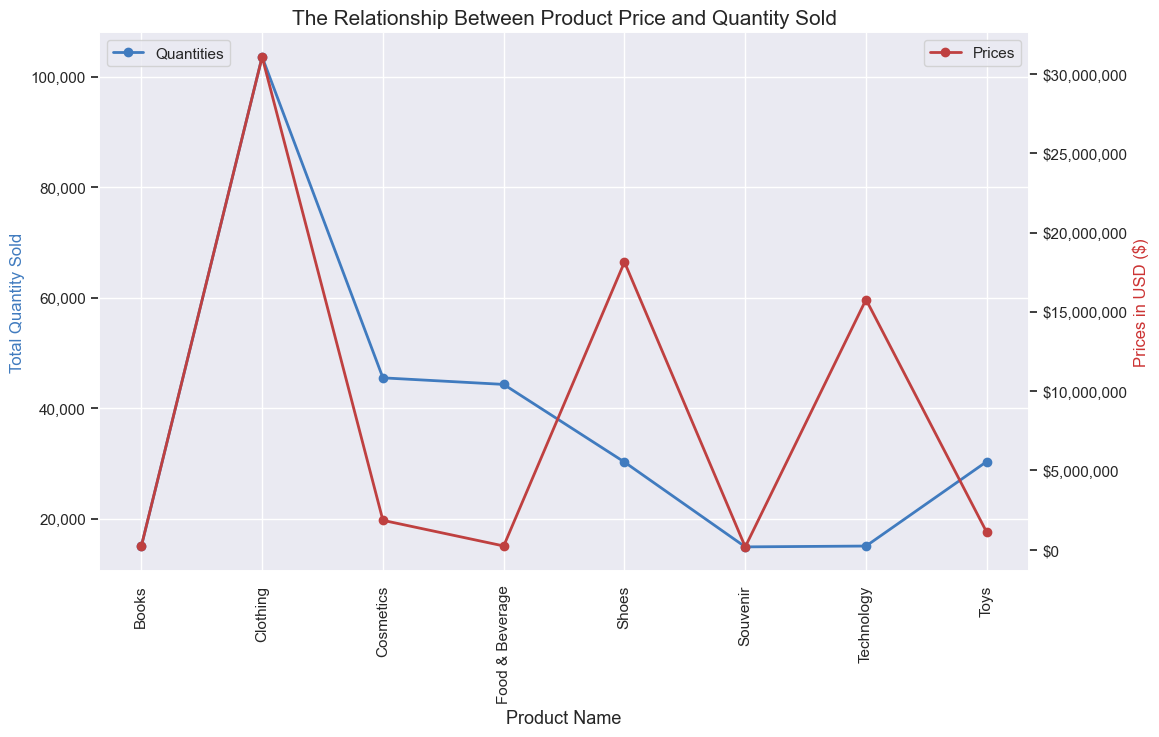

In [120]:
#Creating the first group for quantity sold per product
desired = df.select_dtypes(include=[int, float, object])
products_quantity = desired.groupby(['category']).sum()['quantity']

#extracting the product names 
products = products_quantity.index.values

#creating the second group for price per product
products_prices = desired.groupby(['category']).sum()['price']


#Now, creating a subplot to compare product prices to sold quantities 
fig, ax1 = plt.subplots(figsize=(12,7))

#plottin the data for total sum of quantity sold of each product  
ax1.plot(products, products_quantity,          #specifying the data to plot
        marker='o',        #setting marker shape 
        c='#407bbf',       #setting the line color
        lw=2,              #setting the line width
        label='Quantities')          #labeling the line plot


#plotting the data for the prices of each product
ax2 = ax1.twinx()
ax2.plot(products, products_prices,
        marker='o',
        c='#bf4040',
        lw=2,
        label='Prices')


#Adding a title
ax1.set_title('The Relationship Between Product Price and Quantity Sold', fontsize=15)

#labeling the x-axis
ax1.set_xlabel('Product Name', fontsize=13)

#labeling first y-axis
ax1.set_ylabel('Total Quantity Sold', fontsize=12, color='#407bbf')

#labeling second y-axis 
ax2.set_ylabel('Prices in USD ($)', fontsize=12, color='#cc3333')

#adjusting the rotation of the x-axis' labels
ax1.set_xticklabels(products, rotation='vertical')

#adjusting the y-axis to make numeric values reader-friendly
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

#adding a legend 
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

#adding a grid 
plt.grid()

#displaying the line plot 
plt.show()

In [122]:
products_quantity

category
Books               14982
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Shoes               30217
Souvenir            14871
Technology          15021
Toys                30321
Name: quantity, dtype: int64

In [124]:
products_prices

category
Books                226977.30
Clothing           31075684.64
Cosmetics           1848606.90
Food & Beverage      231568.71
Shoes              18135336.89
Souvenir             174436.83
Technology         15772050.00
Toys                1086704.64
Name: price, dtype: float64

### Display dataset Quantity and Sales by Months (Categorical-Numerical-Categorical column)

In [126]:
#Third, grouping the data by month and calculating the total sales (and quantities) amount for each month
desired = df.select_dtypes(include=[int, float, object])
sales_per_month = desired.groupby(['Months']).sum()[['quantity', 'Sales']]

#sorting the data in alphabetical order by month name
#specifying the sorting order 
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#sorting the data
sales_per_month = sales_per_month.reindex(sort_order)

#to present the sales in USD and display them in a reader-friendly manner
sales_per_month_USD = sales_per_month.copy()
sales_per_month_USD['Sales'] = sales_per_month_USD['Sales'].apply(lambda sale: '${:,.2f}'.format(sale))

#displaying the results 
print('The following table displays the total sales amount (and quantities ordered) for each month:')
sales_per_month_USD

The following table displays the total sales amount (and quantities ordered) for each month:


,quantity,Sales
Months,,
Jan,30897,"$25,755,677.45"
Feb,27945,"$23,980,067.68"
Mar,24644,"$20,826,196.84"
Apr,23819,"$20,360,575.14"
May,24379,"$20,608,277.98"
Jun,23982,"$20,344,057.02"
Jul,24714,"$20,721,536.72"
Aug,23943,"$19,812,561.97"
Sep,22992,"$19,248,108.83"


### Display Total Sold Based Shopping Centers (Categorical-Numerical column)

In [156]:
#Third, grouping the data by month and calculating the total sales (and quantities) amount for each month
desired = df.select_dtypes(include=[int, float, object])
sales_per_shop = desired.groupby(['shopping_mall']).sum()[['Sales']]

#sorting the data in alphabetical order by month name
#specifying the sorting order 
#sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#sorting the data
#sales_per_shop = sales_per_shop.reindex(sort_order)

#to present the sales in USD and display them in a reader-friendly manner
sales_per_shop_USD = sales_per_shop.copy()
sales_per_shop_USD['Sales'] = sales_per_shop_USD['Sales'].apply(lambda sale: '${:,.2f}'.format(sale))

#displaying the results 
print('The following table displays the Total Sold Based Shopping Centers:')
sales_per_shop_USD

The following table displays the Total Sold Based Shopping Centers:


,Sales
shopping_mall,
Cevahir AVM,"$12,645,138.20"
Emaar Square Mall,"$12,406,100.29"
Forum Istanbul,"$12,303,921.24"
Istinye Park,"$24,618,827.68"
Kanyon,"$50,554,231.10"
Mall of Istanbul,"$50,872,481.68"
Metrocity,"$37,302,787.33"
Metropol AVM,"$25,379,913.19"
Viaport Outlet,"$12,521,339.72"


### Display Histogram with Category, Sales by Gender (Categorical-Numerical-Categorical column)

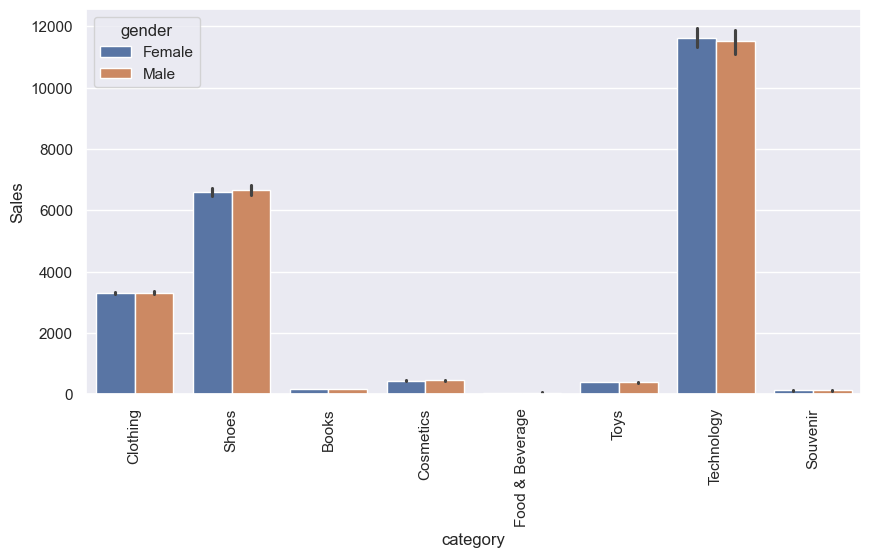

In [128]:
# Display Histogram with Category by Gender 
# m=sns.countplot(data=df, x='category',hue='gender')
m=sns.barplot(x='category', y='Sales',hue='gender',data=df)
plt.xticks(rotation=90)
plt.show()

### Display Histogram with Category, Sales by Age Category (Categorical-Numerical-Categorical column)

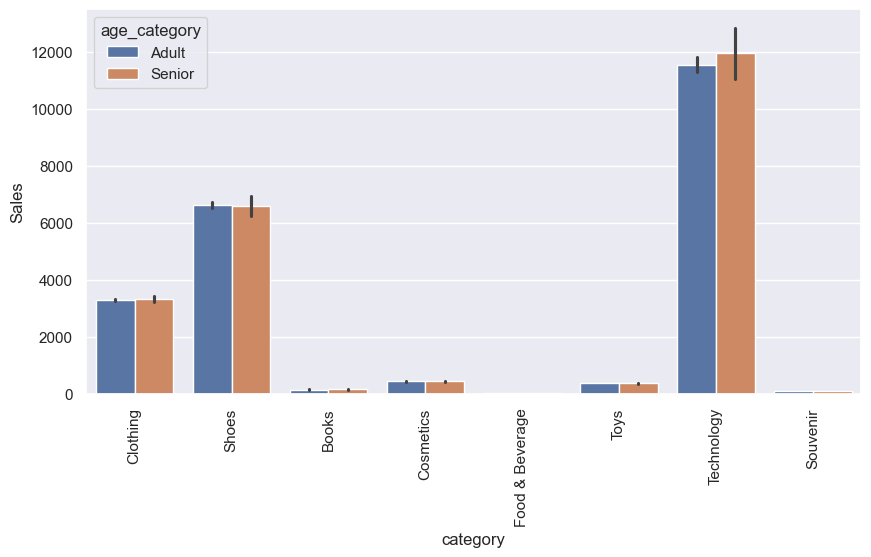

In [132]:
# Display Histogram with Category, Sales by Age category 
# m=sns.countplot(data=df, x='category',hue='gender')
m=sns.barplot(x='category', y='Sales',hue='age_category',data=df)
plt.xticks(rotation=90)
plt.show()